In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('./drive/My Drive/Colab Notebooks/Voice Recognition//')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('./data.csv')
data.head(3)

,Files,labels,Frequency,Audio_length,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,22050.0,1.70,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,22050.0,1.79,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,22050.0,2.62,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 14 columns):
Files               582 non-null object
labels              582 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 63.7+ KB


In [0]:
data = data.dropna()

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 581
Data columns (total 14 columns):
Files               556 non-null object
labels              556 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 65.2+ KB


In [0]:
data2 = data.drop(['Audio_length','Frequency'],axis=1)
data2.head(3)

,Files,labels,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [0]:
X = data2.iloc[:,2:]
X.keys()

Index(['zcr_mean', 'sp_cen_mean', 'sp_rf_mean', 'mfcc_mean', 'spec_bw_mean',
       'rmse_mean', 'chroma_stft_mean', 'Chromagram', 'MelSpectrohram',
       'Amplitude_db'],
      dtype='object')

In [0]:
#col = ['sp_cen_mean','sp_rf_mean','rmse_mean','MelSpectrohram']

In [0]:
#z = data[col]


In [0]:
Y = data.labels


In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)

# Logistic regression

In [0]:
import statsmodels.api as sm

In [0]:
#Frequency+Audio_length+zcr_mean+sp_cen_mean+sp_rf_mean+mfcc_mean+spec_bw_mean+rmse_mean+chroma_stft_mean+Chromagram+MelSpectrohram+Amplitude_db

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
log_model = model.fit(x, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
log_y_pred = log_model.predict(x_test)
log_y_pred


array([3, 1, 4, 1, 2, 4, 2, 2, 1, 1, 4, 4, 2, 2, 4, 3, 1, 2, 2, 4, 4, 2,
       1, 2, 4, 4, 1, 3, 4, 4, 1, 4, 4, 3, 2, 4, 1, 1, 1, 3, 2, 1, 1, 3,
       4, 3, 2, 4, 1, 4, 4, 4, 1, 1, 3, 4, 3, 1, 4, 4, 3, 4, 4, 2, 4, 1,
       1, 2, 2, 4, 2, 3, 4, 2, 1, 2, 1, 2, 3, 1, 4, 2, 4, 2, 2, 1, 4, 4,
       1, 2, 1, 2, 2, 4, 2, 2, 1, 4, 3, 4, 1, 1, 1, 2, 4, 1, 2, 4, 4, 1,
       4, 3])

In [0]:
log_y_prob = log_model.predict_proba(x_test)

In [0]:
from sklearn import metrics
from sklearn.metrics import accuracy_score , roc_curve, auc, classification_report

In [0]:
accuracy_score(log_y_pred,y_test)

0.6339285714285714

In [0]:
log_cm = classification_report(y_test,log_y_pred)
print(log_cm)


              precision    recall  f1-score   support

           1       0.68      0.70      0.69        30
           2       0.62      0.69      0.65        26
           3       0.64      0.43      0.51        21
           4       0.61      0.66      0.63        35

    accuracy                           0.63       112
   macro avg       0.64      0.62      0.62       112
weighted avg       0.64      0.63      0.63       112



In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [0]:
y_test = np.array(y_test).reshape(-1,1)
y_test.shape

(112, 1)

In [0]:
y_true_ohe = ohe.fit_transform(y_test).toarray()
y_true_ohe

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],


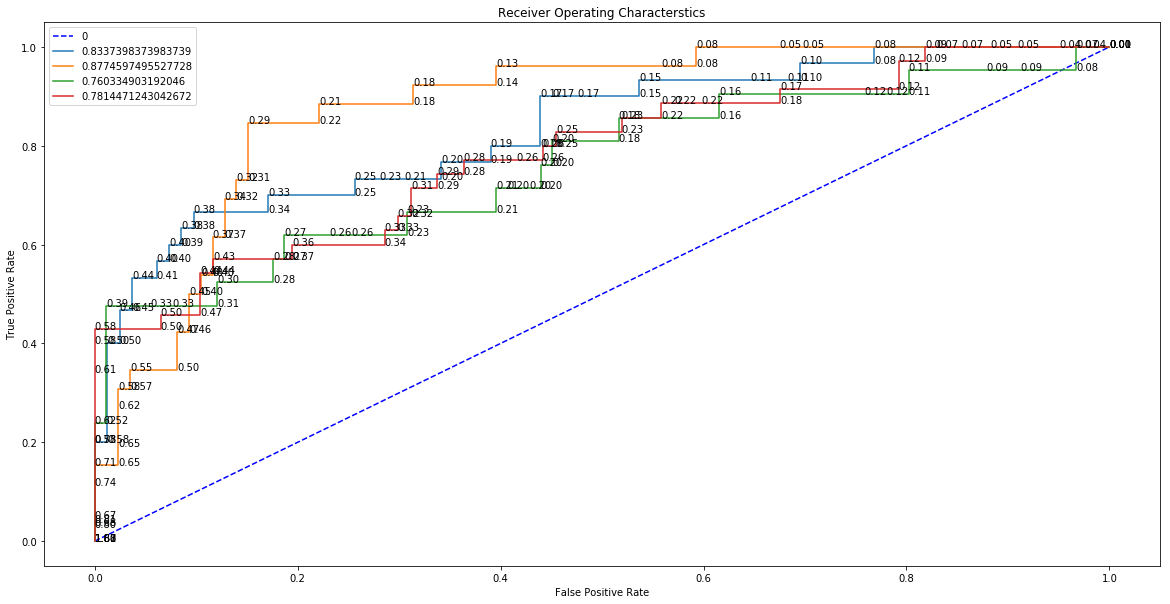

In [0]:
plt.figure(figsize=(20,10))
plt.plot([0,1],[0,1],'b--')
area = [0]

for i in range(4):

    y_true_1 = y_true_ohe[:,i:i+1]
    log_y_prob_1 = log_y_prob[:,i:i+1]
    fpr, trp, thereshold = roc_curve(y_true_1,log_y_prob_1)
    area.append(auc(fpr,trp))
    for j in range(len(fpr)):

        plt.text(fpr[j],trp[j],'%0.2f'%thereshold[j])
        
     
    plt.plot(fpr,trp)
    

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.legend(['Base Line','Others','Bagunava','Namaskaram','Swagatham'])
plt.legend(area)
plt.show()

In [0]:
len(fpr)

45

In [0]:
model = sm.GLM(y_train,x_train).fit()

In [0]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 labels   No. Observations:                  444
Model:                            GLM   Df Residuals:                      434
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                          7.8484
Method:                          IRLS   Log-Likelihood:                -1082.3
Date:                Fri, 02 Aug 2019   Deviance:                       3406.2
Time:                        04:43:42   Pearson chi2:                 3.41e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6584      0.513     -1.282      0.2

In [0]:
#Z=scaler.fit_transform(z)

In [0]:
#x_train2,x_test2,y_train2,y_test2=train_test_split(Z,Y,test_size=0.2)

In [0]:
#model = sm.GLM(y_train2,x_train2).fit()
#print(model.summary())

In [0]:
#from pandas_ml import ConfusionMatrix
#cm = ConfusionMatrix(y_test,log_y_pred)
#cm.stats()

In [0]:
from sklearn.metrics import cohen_kappa_score

In [0]:
cohen_kappa_score(y_test,log_y_pred)

0.5028150714595063

# SVM

In [0]:
from sklearn.svm import SVC

svm=SVC(random_state=1)
svm_model = svm.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
svm_y_pred = svm_model.predict(x_test)
svm_y_pred

array([3, 1, 4, 1, 2, 1, 2, 3, 1, 4, 4, 4, 2, 3, 4, 4, 2, 2, 2, 2, 4, 2,
       1, 2, 4, 4, 1, 4, 3, 4, 1, 4, 2, 3, 2, 4, 1, 4, 1, 2, 2, 4, 1, 3,
       4, 4, 2, 2, 4, 4, 2, 4, 1, 1, 1, 2, 3, 3, 4, 4, 3, 2, 4, 2, 4, 4,
       1, 2, 2, 4, 2, 2, 1, 2, 3, 2, 1, 2, 3, 1, 1, 2, 2, 2, 3, 1, 4, 4,
       2, 2, 1, 2, 3, 4, 2, 2, 1, 2, 4, 2, 3, 1, 4, 2, 4, 1, 2, 4, 4, 4,
       4, 3])

In [0]:
svm_cm = metrics.confusion_matrix(y_test,svm_y_pred)
svm_cm

array([[13,  6,  3,  8],
       [ 2, 23,  0,  1],
       [ 4,  2,  8,  7],
       [ 4,  7,  4, 20]])

In [0]:
#!pip install pandas_ml

In [0]:
#from pandas_ml import ConfusionMatrix
#cm = ConfusionMatrix(y_test,svm_y_pred)
#cm.stats()

In [0]:
accuracy_score(svm_y_pred,y_test)

0.5714285714285714

In [0]:
cohen_kappa_score(y_test,svm_y_pred)

0.4213755247013238

In [0]:
#svm_model2 = svm.fit(x_train2,y_train2)

In [0]:
#svm_y_pred2 = svm_model2.predict(x_test2)

In [0]:
#svm_cm2 = metrics.confusion_matrix(y_test2,svm_y_pred2)
#svm_cm2

In [0]:
#accuracy_score(svm_y_pred2,y_test2)

In [0]:
#cohen_kappa_score(y_test2,svm_y_pred2)

# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [0]:
knn_model = classifier.fit(x_train,y_train)

In [0]:
knn_y_pred = knn_model.predict(x_test)

In [0]:
accuracy_score(knn_y_pred,y_test)

0.5535714285714286

In [0]:
cm = metrics.confusion_matrix(y_test,knn_y_pred)
cm

array([[14,  6,  4,  6],
       [ 1, 25,  0,  0],
       [ 9,  2,  8,  2],
       [ 9,  6,  5, 15]])

In [0]:
test = [22050.0,	1.79,	0.115664,	1774.966989,	3151.163424,	-14.459980,	1608.826526,	0.036079,	0.299946,	0.260970,	0.822725,	-30.595629]
test = np.array(test)

In [0]:
sclr = scaler.fit_transform(test.reshape(-1,1))

In [0]:
from scipy import stats

In [0]:
stats.chisquare(y_test, knn_y_pred)

Power_divergenceResult(statistic=array([425.        , 425.        ,  98.75      , 425.        ,
        95.5       , 425.        ,  95.5       ,  60.33333333,
       425.        , 425.        ,  98.75      ,  98.75      ,
        95.5       , 425.        ,  60.33333333,  98.75      ,
        95.5       ,  95.5       ,  95.5       ,  95.5       ,
       425.        ,  95.5       , 425.        ,  95.5       ,
        98.75      ,  98.75      , 425.        ,  60.33333333,
        60.33333333,  98.75      ,  95.5       ,  98.75      ,
       425.        ,  60.33333333,  95.5       ,  98.75      ,
       425.        ,  98.75      , 425.        ,  95.5       ,
        95.5       , 425.        , 425.        , 425.        ,
       425.        , 425.        ,  95.5       ,  95.5       ,
        98.75      ,  95.5       ,  95.5       ,  98.75      ,
        95.5       , 425.        , 425.        ,  95.5       ,
        60.33333333,  95.5       ,  98.75      ,  98.75      ,
        60.33333333,  

In [0]:
stats.chisquare(y_test, svm_y_pred)

Power_divergenceResult(statistic=array([ 60.33333333, 425.        ,  98.75      , 425.        ,
        95.5       , 425.        ,  95.5       ,  60.33333333,
       425.        ,  98.75      ,  98.75      ,  98.75      ,
        95.5       ,  60.33333333,  98.75      ,  98.75      ,
        95.5       ,  95.5       ,  95.5       ,  95.5       ,
        98.75      ,  95.5       , 425.        ,  95.5       ,
        98.75      ,  98.75      , 425.        ,  98.75      ,
        60.33333333,  98.75      , 425.        ,  98.75      ,
        95.5       ,  60.33333333,  95.5       ,  98.75      ,
       425.        ,  98.75      , 425.        ,  95.5       ,
        95.5       ,  98.75      , 425.        ,  60.33333333,
        98.75      ,  98.75      ,  95.5       ,  95.5       ,
        98.75      ,  98.75      ,  95.5       ,  98.75      ,
       425.        , 425.        , 425.        ,  95.5       ,
        60.33333333,  60.33333333,  98.75      ,  98.75      ,
        60.33333333,  

In [0]:
stats.chisquare(y_test, log_y_pred)

Power_divergenceResult(statistic=array([ 60.33333333, 425.        ,  98.75      , 425.        ,
        95.5       ,  98.75      ,  95.5       ,  95.5       ,
       425.        , 425.        ,  98.75      ,  98.75      ,
        95.5       ,  95.5       ,  98.75      ,  60.33333333,
       425.        ,  95.5       ,  95.5       ,  98.75      ,
        98.75      ,  95.5       , 425.        ,  95.5       ,
        98.75      ,  98.75      , 425.        ,  60.33333333,
        98.75      ,  98.75      , 425.        ,  98.75      ,
        98.75      ,  60.33333333,  95.5       ,  98.75      ,
       425.        , 425.        , 425.        ,  60.33333333,
        95.5       , 425.        , 425.        ,  60.33333333,
        98.75      ,  60.33333333,  95.5       ,  98.75      ,
       425.        ,  98.75      ,  98.75      ,  98.75      ,
       425.        , 425.        ,  60.33333333,  98.75      ,
        60.33333333, 425.        ,  98.75      ,  98.75      ,
        60.33333333,  

# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn  import tree

In [0]:
model = tree.DecisionTreeClassifier()
dt_model = model.fit(x_train,y_train)
print('Train data fitted successfully')
print(dt_model)

Train data fitted successfully
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [0]:
dt_y_pred = dt_model.predict(x_test)

In [0]:
dt_cm = metrics.confusion_matrix(y_test,dt_y_pred)
dt_cm

array([[13,  2,  8,  7],
       [ 0, 25,  0,  1],
       [ 5,  1, 12,  3],
       [ 4,  5,  7, 19]])

In [0]:
accuracy_score(dt_y_pred,y_test)

0.6160714285714286

In [0]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, dt_y_pred)**0.5
RMSE

1.2955969390869324

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rf_model = rmf.fit(x_train,y_train)
rf_model

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_test.shape

(112, 1)

In [0]:
rf_y_pred = rf_model.predict(x_test)

In [0]:
rf_cm = metrics.confusion_matrix(y_test,rf_y_pred)
rf_cm

array([[11,  3,  3, 13],
       [ 3, 18,  3,  2],
       [ 3,  2,  7,  9],
       [ 2,  8,  4, 21]])

In [0]:
accuracy_score(y_test,rf_y_pred)

0.5089285714285714

In [0]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, rf_y_pred)**0.5
RMSE

1.4110533046527436

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt


y = label_binarize(Y, classes=[1,2,3,4])
n_classes = 4


# classifier
#clf = OneVsRestClassifier(LinearSVC(random_state=0))
#y_score = clf.fit(x_train, y_train).decision_function(x_test)

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

ValueError: ignored

# AdaBoost

In [0]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [0]:
kfold = model_selection.KFold(n_splits=10,random_state=7)

In [0]:
ada_result = model_selection.cross_val_score(rf_model,x_train,y_train,cv=kfold)
print(ada_result)
print(kfold)

In [0]:
print(ada_result.mean())

### AdaBoost by using sklearn


In [0]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
adamodel = AdaBoostClassifier(n_estimators=num_trees, random_state=7)

In [0]:
ada_model = adamodel.fit(x_train,y_train)
ada_model

In [0]:
ada_y_pred = ada_model.predict(x_test)

In [0]:
ada_cm = metrics.confusion_matrix(y_test,ada_y_pred)
ada_cm

In [0]:
accuracy_score(y_test,ada_y_pred)

# XGBoost

In [0]:
from xgboost import XGBClassifier


In [0]:
xg = XGBClassifier()
xg_model = xg.fit(x_train,y_train)

In [0]:
xg_y_pred = xg_model.predict(x_test)

In [0]:
xg_cm = metrics.confusion_matrix(y_test,xg_y_pred)
xg_cm

In [0]:
accuracy_score(y_test,xg_y_pred)

# Neural Network

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [0]:
dummy_y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

#### 10 inputs -> [128 hidden nodes] -> 4 outputs

In [0]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(input_shape=[10,],units=4, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
model = baseline_model()
model.summary()

W0802 04:48:38.763350 140282270730112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 04:48:38.813104 140282270730112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 04:48:38.821353 140282270730112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 04:48:38.844531 140282270730112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 04:48:38.875286 140282270730112 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 44        
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [0]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
estimator

In [0]:
tb = TensorBoard('./logs')

In [0]:
ohe = OneHotEncoder()

y_train_ohe = ohe.fit_transform(np.array(y_train).reshape(-1,1))
y_test_ohe = ohe.fit_transform(np.array(y_test).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
x_train.shape, y_train_ohe.shape,x_test.shape, y_test_ohe.shape

((444, 10), (444, 4), (112, 10), (112, 4))

In [0]:
model.fit(x=x_train,y=y_train_ohe,batch_size=30,epochs=100,validation_data=[x_test,y_test_ohe],callbacks=[tb])

W0802 04:48:51.939415 140282270730112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0802 04:48:51.990654 140282270730112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 444 samples, validate on 112 samples


W0802 04:48:52.408743 140282270730112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0802 04:48:52.410511 140282270730112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/100
444/444 [==============================] - 0s 879us/step - loss: 1.5476 - acc: 0.2523 - val_loss: 1.5236 - val_acc: 0.2679
Epoch 2/100
444/444 [==============================] - 0s 67us/step - loss: 1.5134 - acc: 0.2613 - val_loss: 1.4885 - val_acc: 0.2857
Epoch 3/100
444/444 [==============================] - 0s 66us/step - loss: 1.4842 - acc: 0.2770 - val_loss: 1.4543 - val_acc: 0.3304
Epoch 4/100
444/444 [==============================] - 0s 64us/step - loss: 1.4579 - acc: 0.2995 - val_loss: 1.4231 - val_acc: 0.3393
Epoch 5/100
444/444 [==============================] - 0s 74us/step - loss: 1.4336 - acc: 0.3198 - val_loss: 1.3974 - val_acc: 0.3929
Epoch 6/100
444/444 [==============================] - 0s 87us/step - loss: 1.4112 - acc: 0.3266 - val_loss: 1.3771 - val_acc: 0.3929
Epoch 7/100
444/444 [==============================] - 0s 70us/step - loss: 1.3924 - acc: 0.3536 - val_loss: 1.3571 - val_acc: 0.3839
Epoch 8/100
444/444 [==============================] - 0s 64u

In [0]:
# Evaluate The Model with k-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [0]:
results = cross_val_score(estimator, x, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 53.62% (4.61%)
